In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
import json 
from datetime import datetime
import calendar
#from pandas.io.jason import jason_normalize
#from worldcloud import worldcloud, STOPWORDS

In [3]:
df = pd.read_csv('ted_main.csv')
df.columns
df.shape

(2550, 17)

In [4]:
# convert the unix timestamp string to readable date

df['film_date'] = df['film_date'].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d'))
df['published_date'] = df['published_date'].apply(lambda x: datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d'))


In [6]:
# most viewd talks of all time 

pop_talk = df[['views','title','main_speaker','film_date','published_date']].sort_values('views',ascending = False)[:15]
df[['title','published_date']].sort_values('published_date')

,title,published_date
0,Do schools kill creativity?,2006-06-26
1,Averting the climate crisis,2006-06-26
2,Simplicity sells,2006-06-26
3,Greening the ghetto,2006-06-26
4,The best stats you've ever seen,2006-06-27
...,...,...
2545,What we're missing in the debate about immigra...,2017-09-19
2546,The most Martian place on Earth,2017-09-20
2547,What intelligent machines can learn from a sch...,2017-09-21
2548,A black man goes undercover in the alt-right,2017-09-21


In [10]:
# Observations:
# 1,Ken Robinson's talk on Do schools kill creativity? is the most popular TED talk of all time with 47.2 million views
# 2,Also coincidentally, it is also one of the first talks to ever be uploaded on the TED site
# 3,Robinson's talk is closely followed by Amy Cuddy's talk on Your body language may shape who you are
# 4,There are only 2 talks that surpassed the 40 millions mark and 4 talks that have crossed 30 million mark

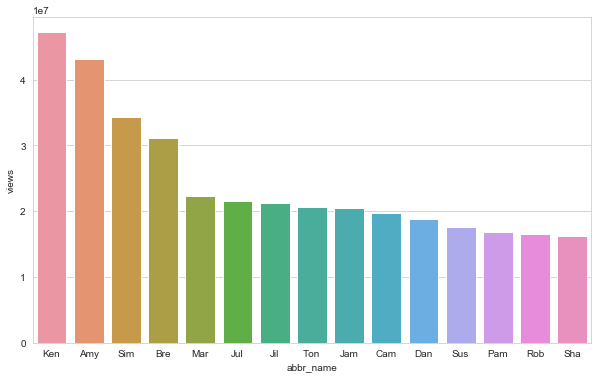

In [7]:
# bar chart to visualise these 15 talks in terms of number of views
pop_talk['abbr_name'] = pop_talk['main_speaker'].apply(lambda x: x[0:3])
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.barplot(x = 'abbr_name' , y = 'views',data = pop_talk)

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

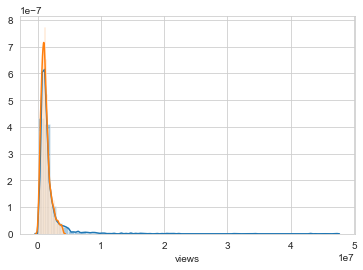

In [8]:
ax = sns.distplot(df['views'])
ax1 = sns.distplot(df[df['views'] < 0.4e7]['views'])
df['views'].describe()


In [9]:
# The average number of views on TED Talk in 1.6 millon, and the meadian number of views is 1.12,
# whcih is the positve skewed
# This suggests a very high average high level of popularity of TED talks. 
# we also notice that the majority of talks have 
# views less than 4 million. we will condider this as the cutoff point when constructing box plots in teh later sections.

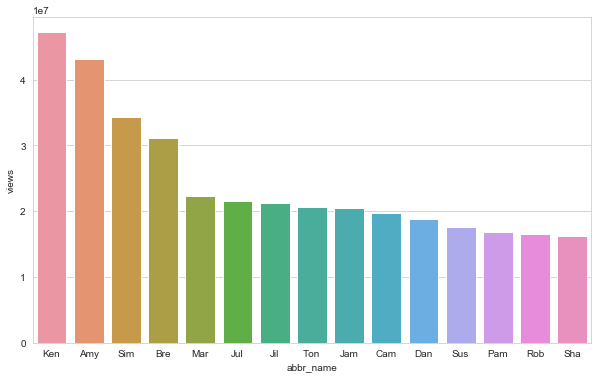

In [11]:
# bar chart to visualise these 15 talks in terms of number of views

pop_talk['abbr_name'] = pop_talk['main_speaker'].apply(lambda x: x[0:3])
sns.set_style('whitegrid')
plt.figure(figsize = (10,6))
sns.barplot(x = 'abbr_name' , y = 'views',data = pop_talk)

count    2.550000e+03
mean     1.698297e+06
std      2.498479e+06
min      5.044300e+04
25%      7.557928e+05
50%      1.124524e+06
75%      1.700760e+06
max      4.722711e+07
Name: views, dtype: float64

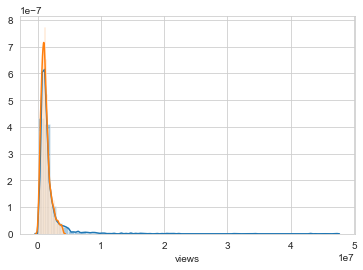

In [12]:
# statistics and distribution 

ax = sns.distplot(df['views'])
ax1 = sns.distplot(df[df['views'] < 0.4e7]['views'])
df['views'].describe()

In [13]:
# The average number of views on TED Talk in 1.6 millon, and the meadian number of views is 1.12,
# whcih is the positve skewed
# This suggests a very high average high level of popularity of TED talks. 
# we also notice that the majority of talks have 
# views less than 4 million. we will condider this as the cutoff point when constructing box plots in teh later sections.

In [14]:
#  Commnets
# =============================================================================
# Although the TED website give us access to all the comments posted publicly, this dataset 
# only gives us teh number of comments. we will therefore have to restrict our analysis to this feature only.
# you could try performing textual analysis by scraping the website for commments.
# =============================================================================

In [15]:
df['comments'].describe()

count    2550.000000
mean      191.562353
std       282.315223
min         2.000000
25%        63.000000
50%       118.000000
75%       221.750000
max      6404.000000
Name: comments, dtype: float64

In [16]:
# # observations:
# 1, On average, there are 191.56 commentss on every TED talks. Assuming the comments are constructive criticism,
# we can conclude that the TED Online Community is highly involved in disscussions revoling TED talks 
# 2, There is a huge std associated with the comments. In fact, it is even larger than the mean suggesting that 
# the measures may be sentive to outliers. We shall plot his to check the nature of the distribution 
# 3， The minimum number of comments on a talk is 2 and the maximum is 6404. The range is 6402. The minimum number,
# though, may be as a result of the talk being posted extremely recently

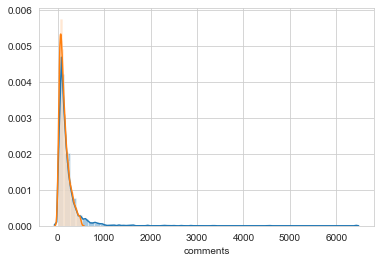

In [17]:
sns.distplot(df['comments'])
sns.distplot(df[df['comments'] < 500]['comments'])

C:\Users\Terence\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


,views,comments
views,1.000000,0.530939
comments,0.530939,1.000000


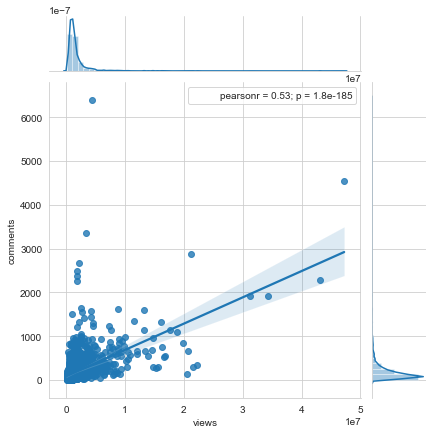

In [18]:
# To find out whether popular video have more comments 

# Draw a scatter plot with marginal histograms:

j = sns.jointplot(x = 'views', y = 'comments', data = df, kind = 'reg')
j.annotate(stats.pearsonr)
# sns.jointplot(x = 'views', y = 'comments', data = df, kind = 'kde', color = 'g')
# sns.jointplot(x = 'views', y = 'comments', data = df).plot_joint(sns.kdeplot, zorder = 0, n_levels = 6)
# sns.jointplot(x = 'views', y = 'comments', data = df, kind = 'hex')

df[['views','comments']].corr()

In [19]:
# =============================================================================
# As the scatterplot and the correlatoin matrix show, the pearson coefficient is slightly more than 0.5.
# This suggest a medium to strong correlation between the two quantities. This was pretty expected as mentioned above
# =============================================================================

In [20]:
# check number of views and comments on the 10 most commented TED Talk of all time


m = df[['title','main_speaker','views','comments']].sort_values('comments', ascending = False).head(10)

In [21]:
# As can be seen above, Richard Dawkins' talk on Militant atheism generated the greateest amount of discussion 
# and opinions despite having significantly lesser views than Ken Robinosns' talk, which is second in the list.
# This raises some interesting questions
# 
# which talk tend to attract the largest amount of discussion ?
# 
# To ansewer this question, we will define a new feature discussion quotient which is simply the ratio of the 
# number of comments to the number of views. we will them check which talks have the largest dicussion quotient

In [22]:
df['dis_quo'] = df['comments'] / df['views']

d = df[['title','description', 'main_speaker','views','comments','dis_quo','film_date']].sort_values('dis_quo',ascending = False).head(10)

In [23]:
# quesitons? i think it only 3 or 4 would be categoried to faith and religion
# 
# This analysis has acutally raised extremely intersting insight. Half of the talks in the top 10 are on the lines of 
# Faith and Religion. I suspect science and religion is still a very hotly debaed topic in 21st century. We shall
# come back to this hypothesis in a later section 
# 
# 
# The most discusses talk, thoughm is The case for same sex marriage(which has religious undertones). this is not 
# that surprising considering the amount of debate the topic caused back in 2009

In [24]:
# Analysing TED talks by the month and the year

In [25]:
# # Context
# # TED(especially TEDx) talks tend to occur all throughout the year. is there a hot month as far as TED is concerned
# In other words, how are the talks distributed thoughout the month since its inception?

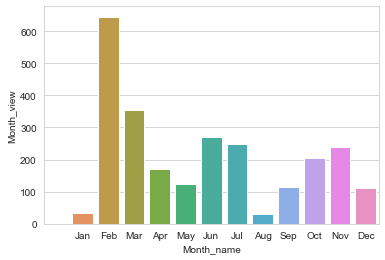

In [26]:
df['month'] = df['film_date'].apply(lambda x: x.split('-')[1])
# df['months'] = df['month'].map(month_abbr)
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[int(x)])

month_count = df['month'].value_counts().reset_index().rename(columns = {'index': 'Month_name', 'month': 'Month_view'})
sns.barplot(x = 'Month_name', y = 'Month_view', data = month_count, order = calendar.month_abbr)

In [27]:
# February is clearly the most popular month for TED Conferences whereas August and January are 
# the least popular. February's is largely due to the fact that the official TED Conference are held in Februart.

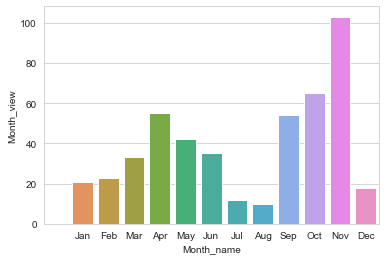

In [28]:
# distribution for TEDx talks only

df_TEDx = df[df['event'].str.contains('TEDx')]

x_month_count = df_TEDx['month'].value_counts().reset_index().rename(columns = {'index':'Month_name' , 'month':'Month_view'})

sns.barplot(x = 'Month_name',y = 'Month_view', data = x_month_count,order = calendar.month_abbr)

In [29]:
# As far as TEDx talks are concerned, November is the most popular month.However, we cannot take this result
# at face value as very few of TEDx talks are actually uploaded to the TED and therefore,it is entirely possible that
# the sample in our dateset is not at all representative of all TEDx talks. A slightly more accurate statement would be 
# that the most popular TEDx talks take place the most in October and Novermber.

In [30]:
# The next question im interested in is the most popular days for conducting TED and TEDx conferences. The tools 
# applied are very sensible to the procedure applied for months.

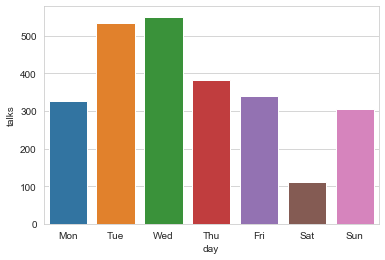

In [31]:
df['day'] = pd.to_datetime(df['film_date']).dt.weekday
df['day'] = df['day'].apply(lambda x: calendar.day_abbr[int(x)])

day_count = df['day'].value_counts().reset_index().rename(columns = { 'index' :'day','day': 'talks' })

sns.barplot(x = 'day', y ='talks',data = day_count, order = calendar.day_abbr)

In [32]:
# The distribution of day is almost a positve skewed bell curve with Tuesday and Wednesday being the most popluar days.
# To my surprise, the Saturday is being least popluar day and sunday is penultimate day. This is prett intereting 
# because i was of the option that most TED Conferences would happend sometime in the weekned.

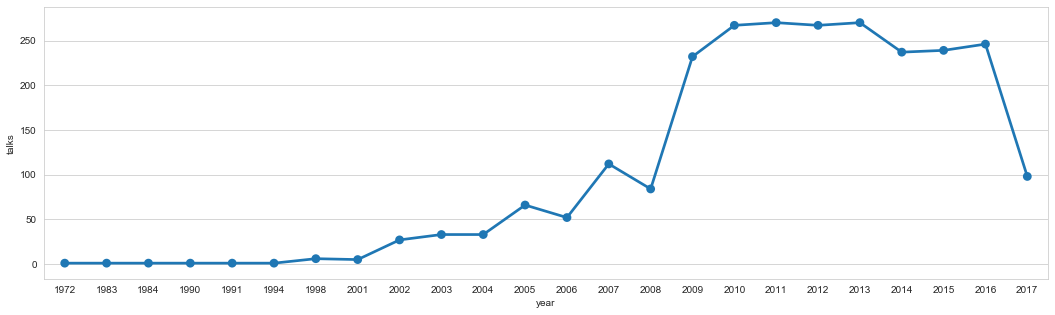

In [34]:
# visualize the number of TED talks through the year and check if our hunch that they have grown significantly is indeed true

df['year'] = df['film_date'].apply(lambda x: x.split('-')[0])

year_count = df['year'].value_counts().reset_index().sort_values(by = 'index')
year_count.columns = ['year', 'talks']

plt.figure(figsize = (18,5))
# plt.plot(year_count['year'],year_count['talks'],color = 'r',marker = 'o')

sns.pointplot(x = 'year', y = 'talks', data = year_count)

In [35]:
# Observations:
# 
# 1, As expected, the number of TED talks have gradually increased over the years since its inception in 1984
# 2, There was a sharp increase in the number if talks in 2009. It might be interesting to know the reason behind
# 2009 being the tipping point where the number of talks increased more than twofold
# 3, the number of talks have been pretty much constant since 2009

In [36]:
# finally, to put it all together, let us construct a heat map that shows us the number of talks by month and year. This 
# will give us a good summary of the distribution of talks 

,main_speaker,appearances
770,Hans Rosling,9
1066,Juan Enriquez,7
1693,Rives,6
1278,Marco Tempest,6
397,Clay Shirky,5
1487,Nicholas Negroponte,5
1075,Julian Treasure,5
424,Dan Ariely,5
850,Jacqueline Novogratz,5
248,Bill Gates,5


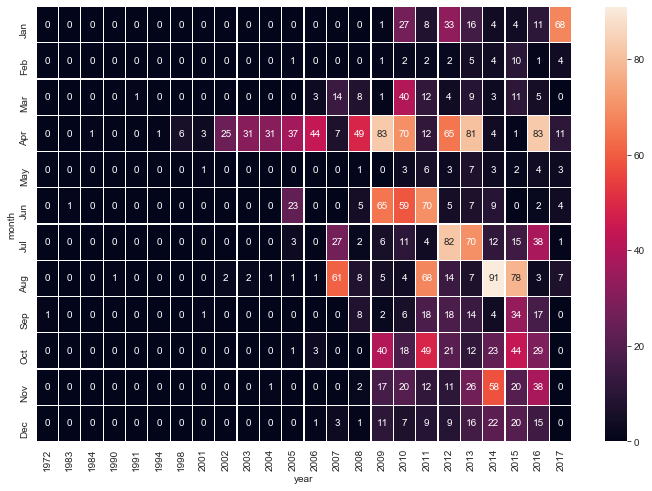

In [37]:
df_pivot = pd.pivot_table(df,values = 'title', index = 'month',columns = 'year',aggfunc = 'count')
df_pivot = df_pivot.fillna(0)

plt.figure(figsize = (12,8))
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.heatmap(df_pivot, annot = True,linewidth = 0.2, yticklabels = month_order )

#  Who are the most popular TED speakers

speaker_df = df.groupby('main_speaker').count()['comments'].reset_index()
speaker_df.columns = ['main_speaker','appearances']
speaker_df = speaker_df.sort_values(by = 'appearances', ascending = False)
speaker_df.head(10)

In [38]:
# Observation
# Hans Rosling is clearly the most popular TED Speaker, with 9 appearance on te TED Forum,
# Juan Enriquez comes a close second with 7 appearances. Rive and Marco Tempest 
# have graced the TED platform 6 times

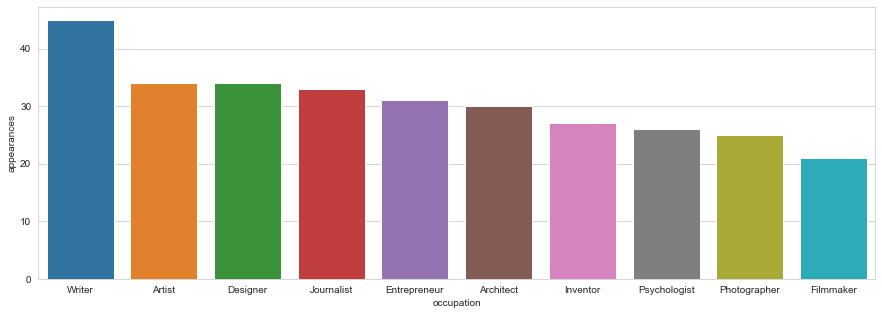

In [39]:
occupation_df = df.groupby('speaker_occupation').count().reset_index()[['speaker_occupation', 'comments']]
occupation_df.columns = ['occupation', 'appearances']
occupation_df = occupation_df.sort_values('appearances', ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='occupation', y='appearances', data=occupation_df.head(10))
plt.show()

In [40]:
# Observation:
# Writers are the most popular with more than 45 speaker identifying themselves as the aforementioed
# Artist and Designers come a distant second with around 35 speakers in each catrgory
# This results must be taken with a pinch of salt as a considerable number of speaker identify themselves with
# mutiple professions(for example, writer/entrepreneur).
# 

In [41]:
# mutiple professions analysis
# =============================================================================
# 
# mutiple_df = df[['main_speaker','speaker_occupation']]
# m = mutiple_df['speaker_occupation'].value_counts(dropna = False)
# m.isnull().sum()

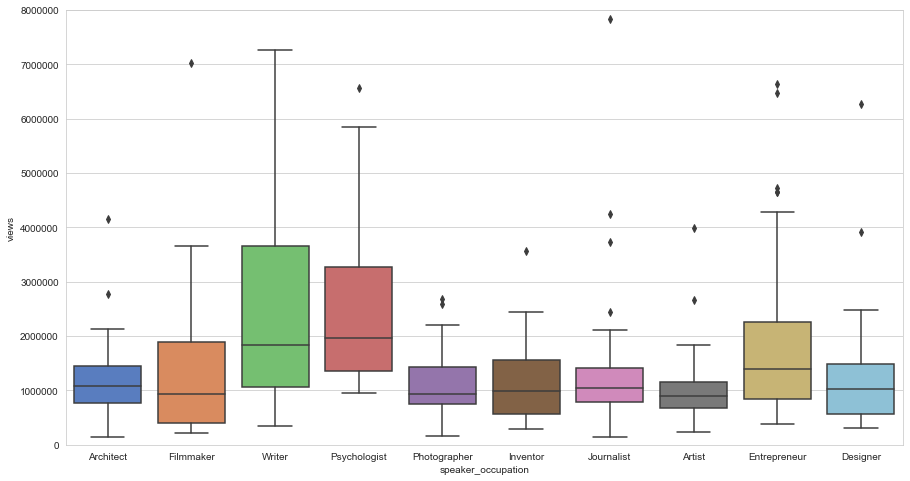

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='speaker_occupation', y='views', data=df[df['speaker_occupation'].isin(occupation_df.head(10)['occupation'])], palette="muted", ax =ax)
ax.set_ylim([0, 0.8e7])
plt.show()

In [43]:
# on average, out of the top 10 most popular professions, psychologists tend to garner the most views.
# writers have the greatest range of views between the first and the third quartile

In [57]:
df['num_speaker'].value_counts()

1    2492
2      49
3       5
4       3
5       1
Name: num_speaker, dtype: int64

In [45]:
# =============================================================================
# almost every talk has just one speaker. There are close to 50 talks where two people shared the stage.
# The maximum number of speakers to share a single stage was 5. 
# have a look at he it with 5 speakers
# =============================================================================

In [56]:
df[df['num_speaker'] == 5][['title','description','main_speaker','event']]

,title,description,main_speaker,event
2507,A dance to honor Mother Earth,Movement artists Jon Boogz and Lil Buck debut ...,Jon Boogz and Lil Buck,TED2017


In [48]:
# =============================================================================
# it turns out the talk titled as A dance to honor Mother earth by Jon Boogz and Lil Buck at the TED 2017 Conference
# =============================================================================

In [49]:
# which ted event tend to hold the most number of ted.com upload worthy events? 

event_df = df[['title','event']].groupby('event').count().reset_index()
event_df.columns = ['event','talks']
event_df = event_df.sort_values(by = 'talks', ascending = False)
event_df.head(10)


,event,talks
64,TED2014,84
59,TED2009,83
63,TED2013,77
66,TED2016,77
65,TED2015,75
99,TEDGlobal 2012,70
61,TED2011,70
60,TED2010,68
98,TEDGlobal 2011,68
57,TED2007,68


In [50]:
#  TED languages 
df['languages'].describe()

count    2550.000000
mean       27.326275
std         9.563452
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max        72.000000
Name: languages, dtype: float64

In [51]:
# on average, a TED talk is avaiable in 27 different languages. The maximum number of languages a TED talk is 
# aviable in is a staggering 72.

In [55]:
lan = df[df['languages'] == 72]
lan

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,related_talks,speaker_occupation,tags,title,url,views,dis_quo,month,day,year
973,736,"Is there something you've always meant to do, ...",207,TED2011,2011-03-02,72,Matt Cutts,Matt Cutts: Try something new for 30 days,1,2011-07-01,...,"[{'id': 947, 'hero': 'https://pe.tedcdn.com/im...",Technologist,"['culture', 'success']",Try something new for 30 days,https://www.ted.com/talks/matt_cutts_try_somet...,8838874,0.000083,Mar,Wed,2011


In [53]:
# The most translated TED talk of all time is Matt Cutts' Try something new in 30 days. the talk does have a very 
# universal theme of exploration. The sheer number of languages its aviable in denmands a little more inspection though
# as it has just over 8 millions, far fewer than the most popular TED talk.
# 
# Finally, let us check if there is a correlation between the number of views and the number of languages a talk is 
# available in. we would think that this should be the case since the talk is more accessible to a larger numbre of people 
# but as mattcutts' talk shows, it may not really be the case 

C:\Users\Terence\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


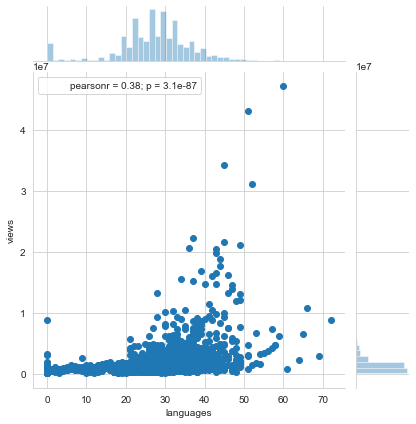

In [58]:
sns.jointplot(x = 'languages', y = 'views',data = df).annotate(stats.pearsonr)

In [59]:
# The Pearson coefficient is 0.38 suggesting a medium correlation between the aforementioned quantites

In [60]:
#  TED themes

#  try to find the most popular themes in the TED conferences

import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

tags = df['tags'].apply(pd.Series).stack().reset_index(level =1, drop = True)
tags.name = 'theme'

theme_df = df.drop('tags', axis = 1).merge(tags,right_index = True, left_index = True)
theme_df.head()

len(theme_df['theme'].value_counts())

416

In [61]:
# TED define a a staggering 416 different categories for its talks

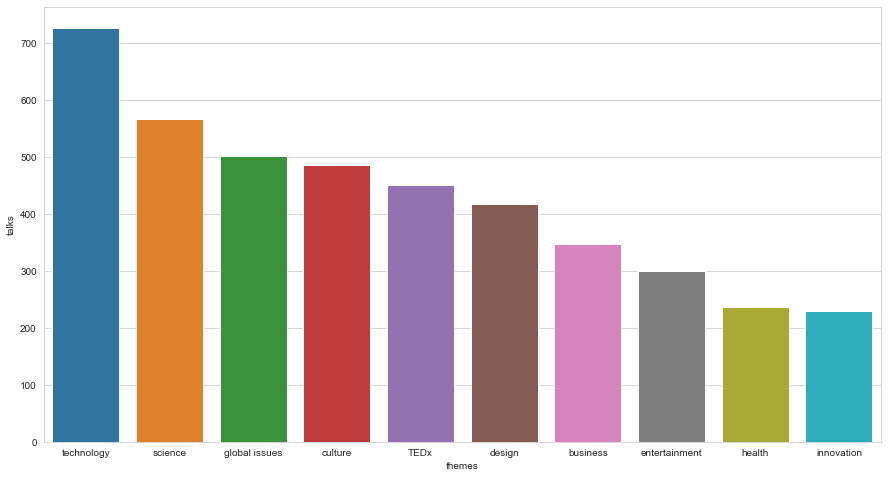

In [62]:
# most popular themes

pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['themes','talks']
pop_themes.head(10)

plt.figure(figsize = (15,8))
sns.barplot(x = 'themes', y = 'talks',data = pop_themes.head(10))
plt.show()

In [63]:
# As may have been expectedm,Technology is the most popular topic for talks. The other two orginal factions,
# Design and Entertainment, also make it to the list of top 10 themes.
# Science and Global issures are the second and third most popular themes repectively 

C:\Users\Terence\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


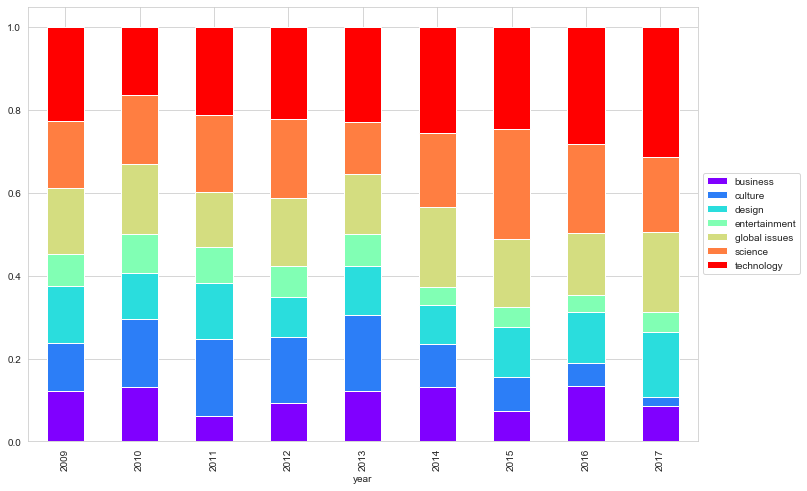

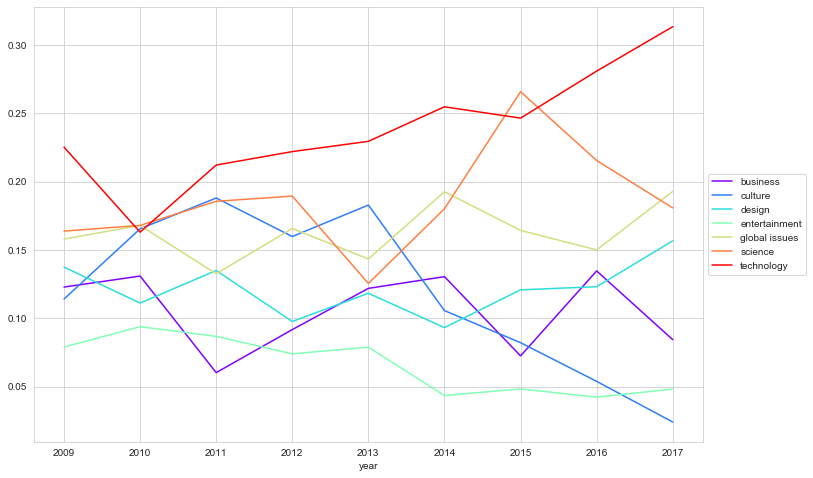

In [64]:
# Has the demand for technology talks increased?
# do certain years have a disproportionate share of talks related to golbal issue?


pop_theme_talks = theme_df[(theme_df['theme'].isin(pop_themes.head(8)['themes'])) & (theme_df['theme'] != 'TEDx')]

pop_theme_talks['year'] = pop_theme_talks['year'].astype('int')

pop_theme_talks = pop_theme_talks[pop_theme_talks['year'] > 2008]

themes = list(pop_themes['themes'].head(8))

themes.remove('TEDx')

ctab = pd.crosstab(pop_theme_talks['year'] ,pop_theme_talks['theme'])
ctab = ctab.apply(lambda x: x/x.sum(), axis = 1 )



ctab.plot(kind = 'bar', stacked = True, colormap = 'rainbow', figsize = (12,8)).legend(loc = 'center left',bbox_to_anchor=(1,0.5))

axs = ctab.plot(kind='line', stacked=False, colormap='rainbow', figsize=(12,8)).legend(loc = 'center left',bbox_to_anchor=(1,0.5))

plt.show()


In [65]:
# =============================================================================
# The proporTion of technology talks has steadily increased over the years with a slight dip in 2010.
# This is understandable considering the boom of techonologies such as blockchain, deep learning, and augmentaed 
# reality capturing people's imagination 
# 
# Talks on culture have witnessed a dip, decreasing steadily starting 2013. The share of culture talks has been the 
# least in 2017. Entertainment talks also seem to have witnessed a slight decline in popularity since 2009
# =============================================================================

# =============================================================================
# like with the speakder occupations, let us investigate if certain topic tend to garner more views than certain 
# other topic. we will be doing this analysis for the top ten categoreis that we discovered in an earlier cell.
# As with the speaker occupations, the box plot will be used to deduce this relation.
# =============================================================================

(0, 5000000.0)

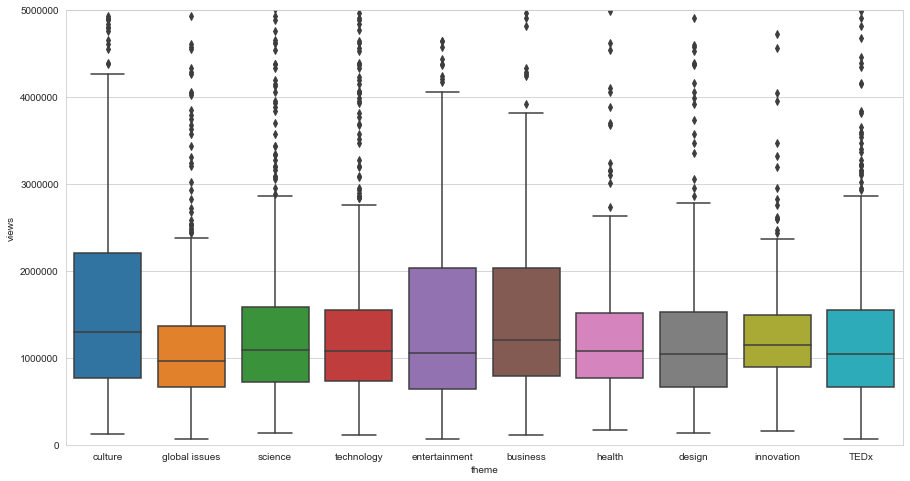

In [66]:
pop_theme_talks = theme_df[theme_df['theme'].isin(pop_themes.head(10)['themes'])]

fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,8))

sns.boxplot(x = 'theme', y = 'views', data = pop_theme_talks)

ax.set_ylim([0, 0.5e7])


In [67]:
# =============================================================================
# Although culture has lost its share in the number of TED talks over the years, they garner the highest meadian number of views
# =============================================================================



# Talk Duration and Word Counts

# =============================================================================
# In this section, we will perform analysis on the length of TED talks. TED is famous for imposing a very strict time 
# of 18 mins. Although this is the suggested limit, there have been talks as short as 2 mins and some have stretched 
# to as long as 24 mins. 
# 
# let us get an idea of distribution of TED talk duration.
# =============================================================================

In [68]:
# convert to mins

df['duration'] = df['duration'] / 60
df['duration'].describe()

count    2550.000000
mean       13.775170
std         6.233486
min         2.250000
25%         9.616667
50%        14.133333
75%        17.445833
max        87.600000
Name: duration, dtype: float64

In [69]:
# TED talls, on average are 13.7 mins long. I find this statistic surprising because TED talks are often
# synonymous with 18 mins and the average is a good 3 mins shorter than that 
# 
# The shortest TED talks on record is 2.25 mins long wheras the longest talk is 87.6 mins long. I am 
# pretty sure the longest talks was not actually a TED talk. lets find out both the shortest and longest talk

In [70]:
shortest = df[df['duration'] == 2.25]
longest = df[df['duration'] == 87.6]

In [71]:
# The shortest talk was at TED2007 titled The ancestor of language by Murray Gell-Mann.
# The longest talk on TED.com as we have guessed, is not a TED talk at all. Rather, it was a 
# talk titled Parrots, the universe and everything delivered by Douglas Adams. at the University of California in 2001
# 
# Let us now check for any correlation between the popularity and the duration of TED Talk. 
# To make sure we only include TED talks, we wil consider only those talks which have a duration less than 15 mins

C:\Users\Terence\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


Text(336.9714285714286, 0.5, 'View')

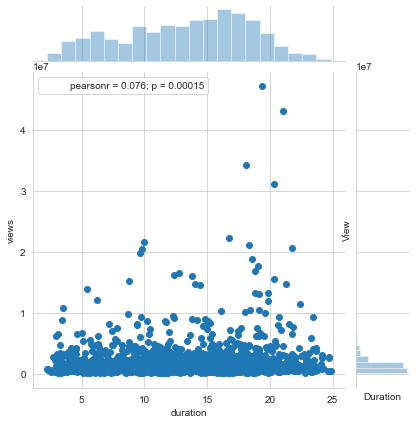

In [72]:
a  = sns.jointplot(x = 'duration', y = 'views', data = df[df['duration'] < 25 ])
a.annotate(stats.pearsonr)

plt.xlabel('Duration')
plt.ylabel('View')


In [73]:
# There seems to be almost no correlation between these two quantites. This strongly suggest that 
# there is no tangible correlation between the length and the popularity of a TED Talk. content is king at TED
# 
# Next, we look at transcripts ot get an idea of word count. For this, we introduce our second dataset, the one
# which contains all transcripts

In [74]:
df2 = pd.read_csv('transcripts.csv')
df2.head()

#  merge two dataframe on url feature to include word counts for every talks
#  left: use only keys from left frame. 
df3 = pd.merge(left = df, right = df2, how = 'left',left_on = 'url',right_on = 'url')
df3.head()

df3['transcript'] = df3['transcript'].fillna('')
df3['wordcount'] = df3['transcript'].apply(lambda x: len(x.split()))
df3['wordcount'].describe()

count    2553.000000
mean     1971.550725
std      1009.494329
min         0.000000
25%      1235.000000
50%      1983.000000
75%      2681.000000
max      9044.000000
Name: wordcount, dtype: float64

In [75]:
# we can see that average TED talk has around 1971 words and there is a significantly large stdof 1009 words.
# The longest talk is more than 9044 words in length 
# 
# like duration, there should not be any correlation between number of workd and views. 
# we will proceed to look at a more interesting statistic: 
# 

In [76]:
# the number of words per minute. 

df3['wpm'] = df3['wordcount'] / df3['duration']
df3['wpm'].describe()


count    2553.000000
mean      142.147752
std        39.635348
min         0.000000
25%       131.069182
50%       149.018182
75%       164.984615
max       247.364865
Name: wpm, dtype: float64

In [77]:
# The average TED Speaker enunciates 142 words per mintue. The fastest talker spoke a staggering 247 words a minute
# which is much higher than the average of 125 to 150 words per minute in english.

In [78]:
# let us see who did it?


f = df3[df3['wpm'] > 245]


In [79]:
# The person is Mae Jemison with a talk on Teach arts and sciences together at Ted 2002 conference.
# We should take this result with a pinch of salt because i went ahead and had a look at the talk and 
# she did not really seem to speak that fast.

In [80]:
# Finally, in this section, i would like to see if there is any correlation between words per minute and popularity 

C:\Users\Terence\anaconda3\lib\site-packages\seaborn\axisgrid.py:1848: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


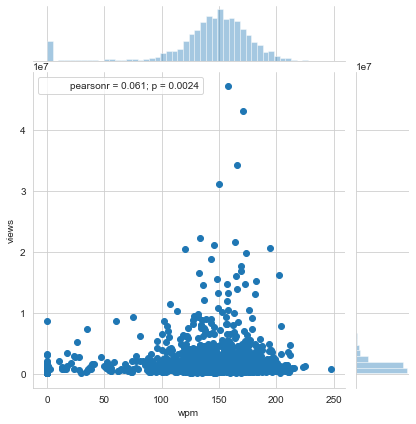

In [81]:
dp = sns.jointplot(x = 'wpm', y = 'views', data = df3[df3['duration'] < 25 ])

dp.annotate(stats.pearsonr)


In [82]:
# Again, there is practically no correlation. If you are going to give a TED talk, you probably 
# should not worry if you are speaking a little faster or a little slower than usual 

In [83]:
# TED ratings 

In [84]:
# Ted allows its users to rate a particular talk on a variety of metrics. We therefore have data on how many 
# ppl found a particular talk funny,inspiring, creative, and a myriad of other verbs.

In [85]:
# let us inspect how this ratings dic actually looks like. 

df.iloc[1]['ratings']

df['ratings'] = df['ratings'].apply(lambda x: ast.literal_eval(x))

df['funny'] = df['ratings'].apply(lambda x: x[0]['count'])
df['jawdrop'] = df['ratings'].apply(lambda x: x[-3]['count'])
df['beautiful'] = df['ratings'].apply(lambda x: x[3]['count'])
df['confusing'] = df['ratings'].apply(lambda x: x[2]['count'])
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,url,views,dis_quo,month,day,year,funny,jawdrop,beautiful,confusing
0,4553,Sir Ken Robinson makes an entertaining and pro...,19.400000,TED2006,2006-02-24,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-26,...,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,0.000096,Feb,Fri,2006,19645,1174,3253,6073
1,265,With the same humor and humanity he exuded in ...,16.283333,TED2006,2006-02-24,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-26,...,https://www.ted.com/talks/al_gore_on_averting_...,3200520,0.000083,Feb,Fri,2006,544,116,58,62
2,124,New York Times columnist David Pogue takes aim...,21.433333,TED2006,2006-02-23,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-26,...,https://www.ted.com/talks/david_pogue_says_sim...,1636292,0.000076,Feb,Thu,2006,964,230,60,183
3,200,"In an emotionally charged talk, MacArthur-winn...",18.600000,TED2006,2006-02-25,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-26,...,https://www.ted.com/talks/majora_carter_s_tale...,1697550,0.000118,Feb,Sat,2006,760,230,59,32
4,593,You've never seen data presented like this. Wi...,19.833333,TED2006,2006-02-21,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27,...,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,0.000049,Feb,Tue,2006,3202,2542,318,942


In [86]:
# Funniest Talks of all time 

In [93]:
funniest = df[['title','main_speaker','views','published_date','funny']].sort_values('funny',ascending = False)
funniest

,title,main_speaker,views,published_date,funny
837,The power of vulnerability,Brené Brown,31168150,2010-12-23,21444
0,Do schools kill creativity?,Ken Robinson,47227110,2006-06-26,19645
1030,How to live before you die,Steve Jobs,8744428,2011-10-05,17290
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-03-11,14447
1129,The happy secret to better work,Shawn Achor,16209727,2012-02-01,11213
...,...,...,...,...,...
135,"""Woza""",Vusi Mahlasela,416603,2007-08-21,4
2548,A black man goes undercover in the alt-right,Theo E.J. Wilson,419309,2017-09-21,3
575,Dragonflies that fly across oceans,Charles Anderson,553253,2009-12-17,2
2530,A smog vacuum cleaner and other magical city d...,Daan Roosegaarde,591131,2017-09-05,2


In [88]:
# Most beautiful talks of all time 

In [92]:
beautiful = df[['title','main_speaker','views','published_date','beautiful']].sort_values('beautiful',ascending = False)
beautiful

,title,main_speaker,views,published_date,beautiful
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-03-11,9437
677,How great leaders inspire action,Simon Sinek,34309432,2010-05-04,8845
381,Your elusive creative genius,Elizabeth Gilbert,13155478,2009-02-08,8130
2161,Inside the mind of a master procrastinator,Tim Urban,14745406,2016-03-15,7445
1129,The happy secret to better work,Shawn Achor,16209727,2012-02-01,7315
...,...,...,...,...,...
704,How poachers became caretakers,John Kasaona,327406,2010-06-08,4
2028,A visual history of human knowledge,Manuel Lima,1710873,2015-08-18,4
2301,Art can heal PTSD's invisible wounds,Melissa Walker,827933,2016-10-12,2
2544,Why Africa must become a center of knowledge a...,Olúfẹ́mi Táíwò,418368,2017-09-19,1


In [90]:
# most jaw dropping talks of all time

In [94]:
jawdrop = df[['title','main_speaker','views','published_date','jawdrop']].sort_values('jawdrop', ascending = False)
jawdrop

,title,main_speaker,views,published_date,jawdrop
4,The best stats you've ever seen,Hans Rosling,12005869,2006-06-27,2542
1163,The power of introverts,Susan Cain,17629275,2012-03-02,2467
381,Your elusive creative genius,Elizabeth Gilbert,13155478,2009-02-08,2093
1030,How to live before you die,Steve Jobs,8744428,2011-10-05,1368
0,Do schools kill creativity?,Ken Robinson,47227110,2006-06-26,1174
...,...,...,...,...,...
2524,"Fun, fierce and fantastical African art",Wanuri Kahiu,522917,2017-08-29,0
2446,A tribute to nurses,Carolyn Jones,1079349,2017-05-08,0
2492,How I fail at being disabled,Susan Robinson,1026708,2017-07-21,0
2491,Hamilton vs. Madison and the birth of American...,Noah Feldman,868290,2017-07-20,0


In [96]:
 # most confusing talks of all time
confusing = df[['title','main_speaker','views','published_date','confusing']].sort_values('confusing', ascending = False)
confusing

,title,main_speaker,views,published_date,confusing
1346,Your body language may shape who you are,Amy Cuddy,43155405,2012-10-01,11111
201,My stroke of insight,Jill Bolte Taylor,21190883,2008-03-11,10464
1163,The power of introverts,Susan Cain,17629275,2012-03-02,10218
246,The transformative power of classical music,Benjamin Zander,9315483,2008-06-24,8108
837,The power of vulnerability,Brené Brown,31168150,2010-12-23,7942
...,...,...,...,...,...
1825,The state of the climate — and what we might d...,Lord Nicholas Stern,773801,2014-09-22,3
2481,A celebration of natural hair,Cheyenne Cochrane,1081270,2017-06-22,3
115,"A string quartet plays ""Blue Room""",Ethel,384641,2007-06-18,3
2507,A dance to honor Mother Earth,Jon Boogz and Lil Buck,182975,2017-08-11,2


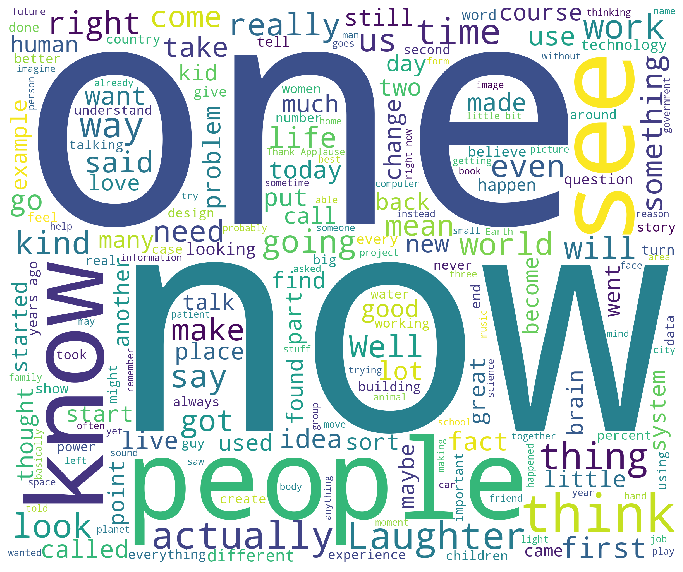

In [97]:
ww = ''.join(df2['transcript'])

from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(ww)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()